<a href="https://colab.research.google.com/github/uzair011/PyTorch-fndmntl/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
what_we_are_covering = {
    1: "Data (prepare and load).",
    2: "Build model.",
    3: "Fitting the model to data (training).",
    4: "Making predictions and evaluating the model (inference).",
    5: "Saving and loading the model.",
    6: "Putting it all together."
}
what_we_are_covering

{1: 'Data (prepare and load).',
 2: 'Build model.',
 3: 'Fitting the model to data (training).',
 4: 'Making predictions and evaluating the model (inference).',
 5: 'Saving and loading the model.',
 6: 'Putting it all together.'}

In [2]:
import torch
from torch import nn # nn contains all of the building blocks for neural networks. 
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.0.1+cu118'

## Data (Preparing and Loading)

* In maching learning data can be almost anything...
  1. Execl spread sheet
  2. Images
  3. Videos
  4. Texts
  5. Audio files
  5. DNA...

   Main Concepts in ML
   1. Get data in to numerical representation. 
   2. Build a model to learn patterns in the model.


   * To showcase this, lets create some *KNOWN* data using linear regression formula.
   * Here we'll use a linear regression formula to create straight line with known *parameters*.

In [3]:
# create *known* parameters
weight = 0.8
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(X[:10])
print("")
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

tensor([[0.3000],
        [0.3160],
        [0.3320],
        [0.3480],
        [0.3640],
        [0.3800],
        [0.3960],
        [0.4120],
        [0.4280],
        [0.4440]])


In [4]:
len(X), len(y)

(50, 50)

## Splitting data into training and testing sets (one of the core concepts in ML, DL)



In [5]:
# creating a training and test set with our data

train_split = int(0.8 * len(X))
x_train, y_train = X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]
len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

Visualizing the data.
explorer's moto :  "Visualize, visualize, visualize....."

In [6]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     prediction=None):
  """Plots trainning data, testing data and compares predictions..."""

  plt.figure(figsize=(10, 7))

  #plot training data into blue
  plt.scatter(train_data, train_labels, c="blue", s=4, label="training dataset")
  #plot testing data into yellow
  plt.scatter(test_data, test_labels, c="purple", s=4, label="testing dataset")

  # are there any predictions?
  if prediction is not None:
    #plot the predictions if they exist
    plt.scatter(test_data, prediction, c="red", s=4, label="predictions")

  # show the legend
  plt.legend(prop={"size": 14})  

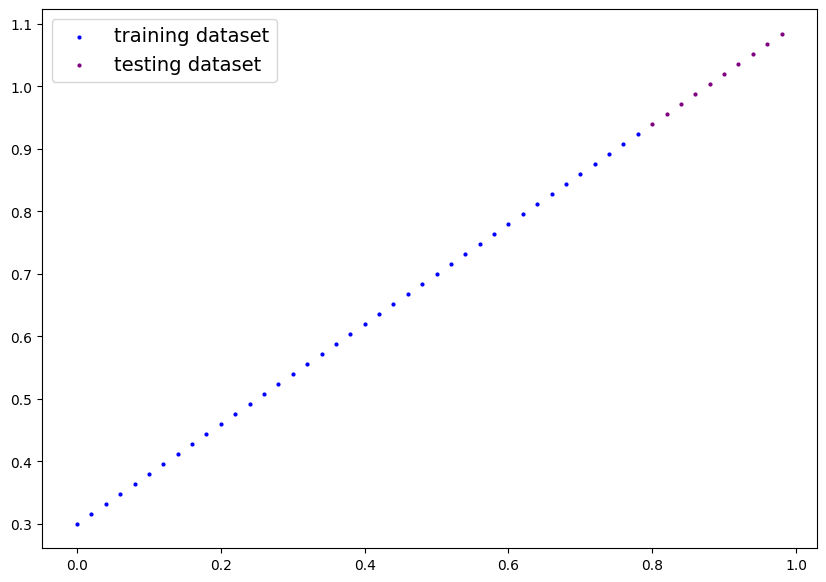

In [7]:
plot_predictions()

## Build a PyTorch Model

In [ ]:

class LinearRegressionModel(nn.module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, 
                                           requires_grad=True,
                                           dtype = float))
    
